In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [2]:
# Set random seed to get the same result after each time running the code
tf.random.set_seed(1234)

In [3]:
#  dataset loading
data = pd.read_csv(r"C:\Users\SURUJ_KALITA\Desktop\blstm\MumbaiCovidcsv.csv")
data

,From Date,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
0,01-01-2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-2019 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2019 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2019 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-2019 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43819,31-12-2023 19:00,36.453333,30.333333,29.490000,77.9,0.1450,260.7450,NaN,1011.2050,NaN,26.6525
43820,31-12-2023 20:00,41.647500,30.370000,40.027500,77.9,0.1350,262.8250,NaN,1011.9075,NaN,25.5975
43821,31-12-2023 21:00,58.050000,30.092500,50.552500,77.9,0.1350,264.1175,NaN,1012.3650,NaN,24.8025
43822,31-12-2023 22:00,NaN,30.623333,49.326667,77.9,0.1400,263.9175,NaN,1012.6775,NaN,24.0700


# Importing Datasets

In [4]:
file = 'DelhiCovidcsv.csv'
df = pd.read_csv(file, parse_dates = ['From Date'], index_col = 'From Date')
df

,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
From Date,,,,,,,,,,
01-01-2019 00:00,655.50,49.08,92.30,79.22,0.30,226.00,3.57,990.10,NaN,4.65
01-01-2019 01:00,583.50,52.18,62.35,79.70,0.30,197.25,3.62,990.05,NaN,4.58
01-01-2019 02:00,435.75,55.25,60.20,78.10,0.30,202.00,3.57,989.95,NaN,4.72
01-01-2019 03:00,351.50,51.48,52.07,77.48,0.30,197.75,3.65,989.98,NaN,4.43
01-01-2019 04:00,319.75,46.30,49.42,77.98,0.30,230.50,3.87,990.12,NaN,4.02
...,...,...,...,...,...,...,...,...,...,...
31-12-2022 19:00,131.50,58.82,8.65,81.25,0.52,165.50,5.65,976.60,NaN,17.02
31-12-2022 20:00,129.25,55.02,7.15,84.28,0.30,169.00,5.72,976.60,NaN,15.78
31-12-2022 21:00,148.00,53.05,6.08,87.43,0.30,168.25,5.75,976.62,NaN,14.70


# Data Pre Processing

In [5]:
df = data.drop(columns=['NO2' , 'Ozone' , 'RH' , 'WS' , 'WD' , 'SR' , 'BP' , 'RF' , 'AT'])

In [6]:
df

,From Date,PM2.5
0,01-01-2019 00:00,NaN
1,01-01-2019 01:00,NaN
2,01-01-2019 02:00,NaN
3,01-01-2019 03:00,NaN
4,01-01-2019 04:00,NaN
...,...,...
43819,31-12-2023 19:00,36.453333
43820,31-12-2023 20:00,41.647500
43821,31-12-2023 21:00,58.050000
43822,31-12-2023 22:00,NaN


In [10]:
# # Assuming df is already defined and loaded
# df = df.loc[:, ['From Date', 'PM2.5']]

# # Total number of missing values
# print('Total num of missing values:', df['PM2.5'].isnull().sum())
# print('')

# # Locate the missing value
# df_missing_date = df.loc[df['PM2.5'].isnull()]
# print('The date of missing value:')
# print(df_missing_date.loc[:, ['From Date']])

# # Replace missing value with interpolation
# df['PM2.5'].interpolate(inplace=True)

# # Drop the 'From Date' column
# df = df.drop('From Date', axis=1)

# # Optionally, print df to see the changes
# print(df)


In [11]:
# Replaceing NaN values with 0
df.fillna(0, inplace=True)

In [13]:
# Split train data and test data
train_size = int(len(df)*0.8)

# train_data = df.PM2.5.loc[:train_size] -----> it gives a series
# Do not forget use iloc to select a number of rows
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [14]:
# Scale data
# The input to scaler.fit -> array-like, sparse matrix, dataframe of shape (n_samples, n_features)
scaler = MinMaxScaler().fit(train_data)

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [15]:
# Create input dataset
# Th input shape should be [samples, time steps, features]
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
        
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train_scaled,30)
X_test, y_test = create_dataset(test_scaled,30)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (35029, 30, 1)
y_train.shape:  (35029, 1)
X_test.shape:  (8735, 30, 1)
y_test.shape:  (8735, 1)


In [16]:
X_test[:33].shape

(33, 30, 1)

In [17]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer 
    model.add(GRU (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
   
    return model
model_gru = create_gru(64)

# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model

model_bilstm = create_bilstm(64)

def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 16, shuffle = False, callbacks = [early_stop])
    return history

history_gru = fit_model(model_gru)
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
1752/1752 [==============================] - 29s 15ms/step - loss: 3.9532e-04 - val_loss: 3.0176e-04
Epoch 2/100
1752/1752 [==============================] - 25s 14ms/step - loss: 3.1395e-04 - val_loss: 3.6429e-04
Epoch 3/100
1752/1752 [==============================] - 25s 14ms/step - loss: 3.2877e-04 - val_loss: 6.2028e-04
Epoch 4/100
1752/1752 [==============================] - 26s 15ms/step - loss: 3.1106e-04 - val_loss: 4.2854e-04
Epoch 5/100
1752/1752 [==============================] - 25s 14ms/step - loss: 3.0277e-04 - val_loss: 4.6661e-04
Epoch 6/100
1752/1752 [==============================] - 29s 16ms/step - loss: 3.0678e-04 - val_loss: 5.2094e-04
Epoch 7/100
1752/1752 [==============================] - 26s 15ms/step - loss: 3.1266e-04 - val_loss: 4.5823e-04
Epoch 8/100
1752/1752 [==============================] - 26s 15ms/step - loss: 3.0287e-04 - val_loss: 4.6586e-04
Epoch 9/100
1752/1752 [==============================] - 26s 15ms/step - loss: 3.0493e-04 - val_

In [18]:
output_size = 10
model = model_bilstm
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(output_size))  # Output layer with 'output_size' neurons for multi-step ahead prediction
model.compile(optimizer='adam', loss='mse')

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
1095/1095 [==============================] - 26s 19ms/step - loss: 4.8103e-04 - val_loss: 2.9260e-04
Epoch 2/100
1095/1095 [==============================] - 19s 17ms/step - loss: 2.6494e-04 - val_loss: 2.8476e-04
Epoch 3/100
1095/1095 [==============================] - 20s 18ms/step - loss: 2.2298e-04 - val_loss: 2.9325e-04
Epoch 4/100
1095/1095 [==============================] - 20s 18ms/step - loss: 2.1785e-04 - val_loss: 2.7605e-04
Epoch 5/100
1095/1095 [==============================] - 20s 18ms/step - loss: 2.1661e-04 - val_loss: 2.9517e-04
Epoch 6/100
1095/1095 [==============================] - 20s 18ms/step - loss: 2.1626e-04 - val_loss: 2.7168e-04
Epoch 7/100
1095/1095 [==============================] - 20s 18ms/step - loss: 2.1151e-04 - val_loss: 2.8830e-04
Epoch 8/100
1095/1095 [==============================] - 20s 18ms/step - loss: 2.1183e-04 - val_loss: 2.9003e-04
Epoch 9/100
1095/1095 [==============================] - 20s 18ms/step - loss: 2.1301e-04 - val_

Epoch 73/100
1095/1095 [==============================] - 20s 18ms/step - loss: 1.9047e-04 - val_loss: 2.7449e-04
Epoch 74/100
1095/1095 [==============================] - 20s 18ms/step - loss: 1.8909e-04 - val_loss: 2.8005e-04
Epoch 75/100
1095/1095 [==============================] - 20s 18ms/step - loss: 1.8858e-04 - val_loss: 2.7906e-04
Epoch 76/100
1095/1095 [==============================] - 20s 19ms/step - loss: 1.9005e-04 - val_loss: 2.9772e-04
Epoch 77/100
1095/1095 [==============================] - 20s 18ms/step - loss: 1.8983e-04 - val_loss: 2.7262e-04
Epoch 78/100
1095/1095 [==============================] - 20s 18ms/step - loss: 1.8955e-04 - val_loss: 2.8700e-04
Epoch 79/100
1095/1095 [==============================] - 20s 18ms/step - loss: 1.8908e-04 - val_loss: 2.7497e-04
Epoch 80/100
1095/1095 [==============================] - 20s 18ms/step - loss: 1.9000e-04 - val_loss: 2.7491e-04
Epoch 81/100
1095/1095 [==============================] - 20s 18ms/step - loss: 1.8891e-

In [21]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

273/273 [==============================] - 2s 6ms/step - loss: 2.6819e-04
Test Loss: 0.00026818906189873815
273/273 [==============================] - 2s 6ms/step


In [22]:
model_bilstm = model 

# Model Performance

273/273 [==============================] - 2s 6ms/step
GRU:
Mean Absolute Error: 11.8389
Root Mean Square Error: 15.4497

Bidirectiona LSTM:
Mean Absolute Error: 6.5233
Root Mean Square Error: 11.0430



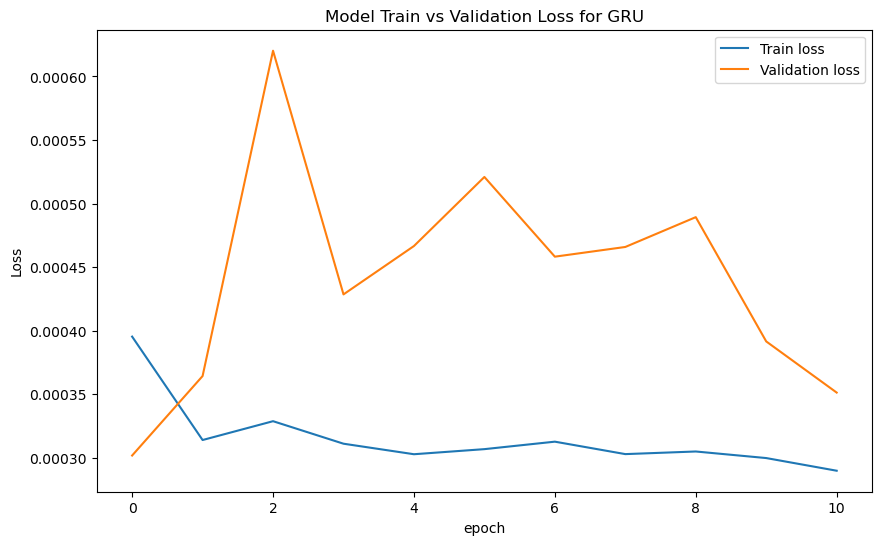

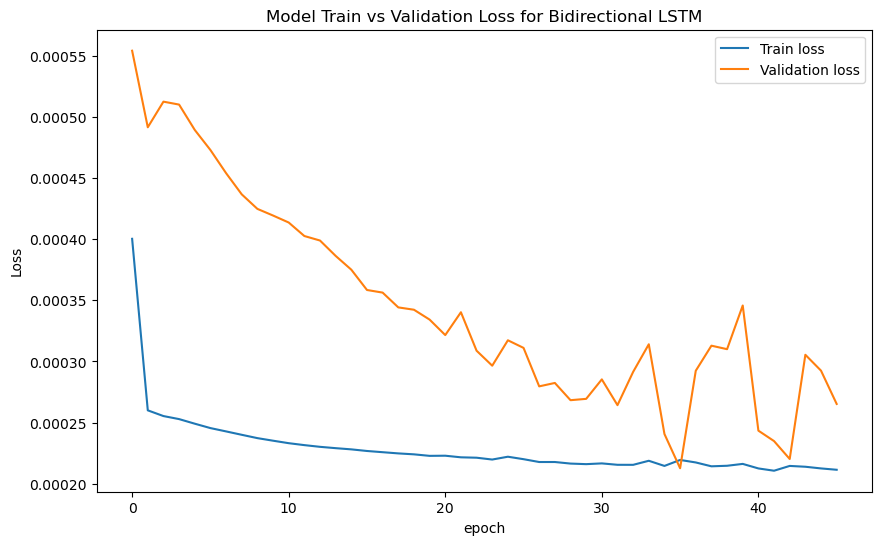

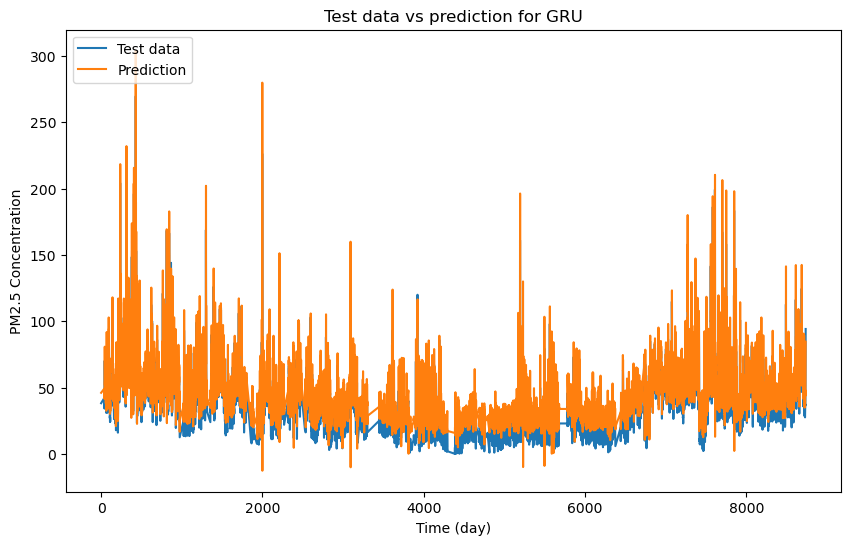

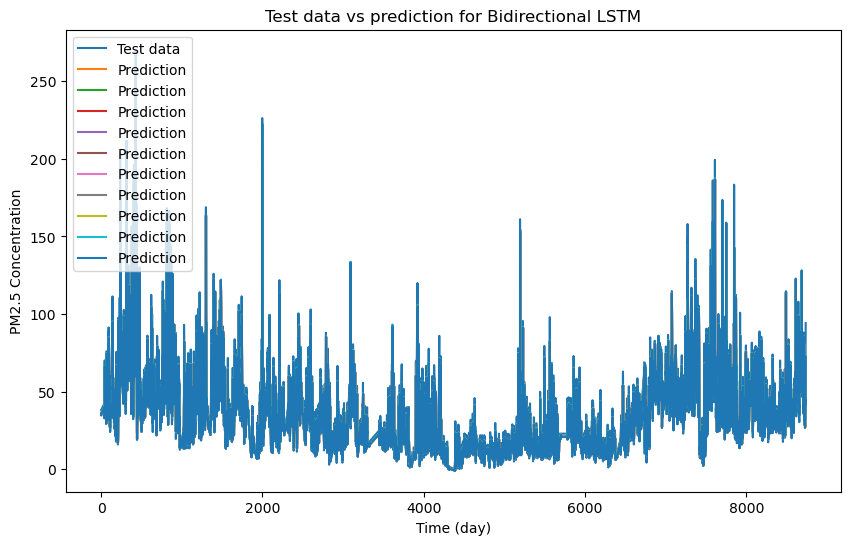

In [23]:
# Plot train loss and validation loss
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    plt.savefig(r"C:\Users\SURUJ_KALITA\Desktop\blstm'+model_name+.jpg", format='jpg', dpi=1000)

plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

# Transform data back to original data space
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='Test data')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('PM2.5 Concentration')
       
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectiona LSTM')

In [24]:
# Select 60 days of data from test data
new_data = test_data.iloc[100:160]
# Scale the input
scaled_data = scaler.transform(new_data)
# Reshape the input 
def create_dataset (X, look_back = 1):
    Xs = []
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        
    return np.array(Xs)

X_30= create_dataset(scaled_data,30)
print('X_30.shape: ', X_30.shape) 

X_30.shape:  (30, 30, 1)


1/1 [==============================] - 0s 73ms/step


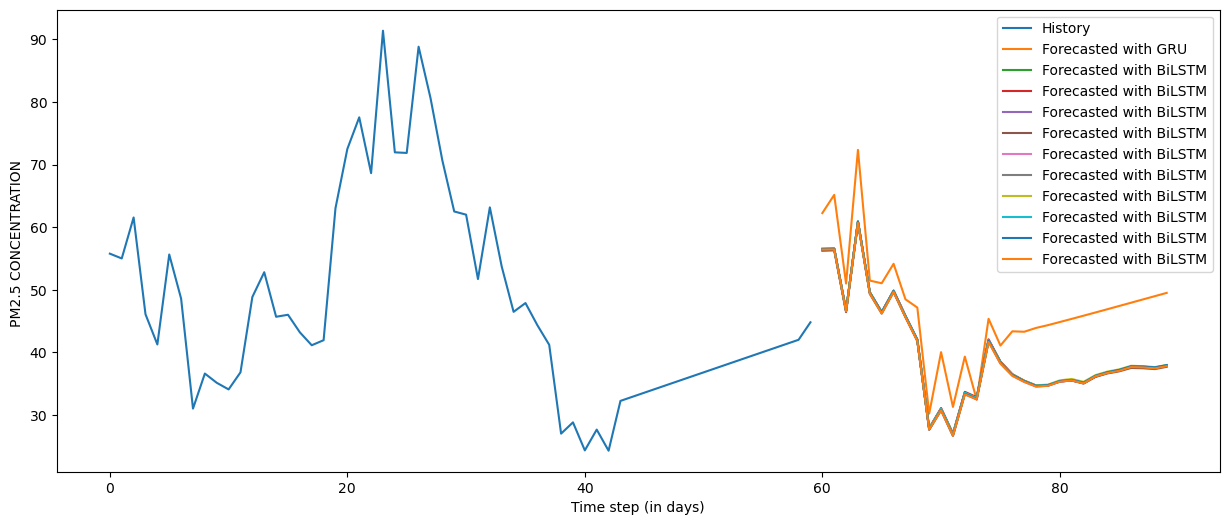

In [34]:
# Make prediction for new data
def prediction(model):
    prediction = model.predict(X_30)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

# # Plot history and future
# def plot_multi_step(history, prediction1, prediction2):
    
#     plt.figure(figsize=(15, 6))
    
#     range_history = len(history)
#     range_future = list(range(range_history, range_history + len(prediction1)))
#     range_future = list(range(range_history, range_history + len(prediction2)))

# #     range_history = len(history)
# #     range_future_gru = list(range_history, range_history + len(prediction1))
# #     range_future_bilstm = list(range_history, range_history + len(prediction2))



    

#     plt.plot(np.arange(range_history), np.array(history), label='History')
#     plt.plot(range_future, np.array(prediction1),label='Forecasted with GRU')
#     plt.plot(range_future, np.array(prediction2),label='Forecasted with BiLSTM')
    
def plot_multi_step(history, prediction1, prediction2):
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future_gru = np.arange(range_history, range_history + len(prediction1))
    range_future_bilstm = np.arange(range_history, range_history + len(prediction2))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future_gru, np.array(prediction1), label='Forecasted with GRU')
    plt.plot(range_future_bilstm, np.array(prediction2), label='Forecasted with BiLSTM')   
    
    
    
    plt.legend(loc='upper right')
    plt.xlabel('Time step (in days)')
    plt.ylabel('PM2.5 CONCENTRATION ')
   
    
plot_multi_step(new_data, prediction_gru, prediction_bilstm)

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

# Ensure predictions have the same shape as y_test
# If y_pred has multiple outputs, select the first one (or the appropriate one)
if predictions.ndim > 1:
    predictions = predictions[:, 2]  # Adjust the index as needed

# Calculate Fraction of predictions with a factor of 2 (FAC2)
def fac2(y_true, y_pred):
    within_factor = (y_true / y_pred <= 2) & (y_pred / y_true <= 2)
    return np.mean(within_factor)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate Correlation Coefficient (r)
r = np.corrcoef(np.ravel(y_test), np.ravel(predictions))[0, 1]

# Calculate Mean Gross Error (MGE)
mge = np.mean(np.abs(y_test - predictions))

# Calculate Mean Bias (MB)
mb = np.mean(y_test - predictions)

# Calculate Coefficient of Efficiency (COE)
coe = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Calculate Coefficient of Determination (R2 score)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f'Fraction of predictions with a factor of 2 (FAC2): {fac2(y_test, predictions)}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Correlation Coefficient (r): {r}')
print(f'Mean Gross Error (MGE): {mge}')
print(f'Mean Bias (MB): {mb}')
print(f'Coefficient of Efficiency (COE): {coe}')
print(f'Coefficient of Determination (R2 score): {r2}')


Fraction of predictions with a factor of 2 (FAC2): 0.004953288145611628
Root Mean Square Error (RMSE): 42.98235576181896
Correlation Coefficient (r): 0.8945662873577489
Mean Gross Error (MGE): 35.544736714035814
Mean Bias (MB): 35.544735920321216
Coefficient of Efficiency (COE): -27582.16659180648
Coefficient of Determination (R2 score): -2.1552636244234145


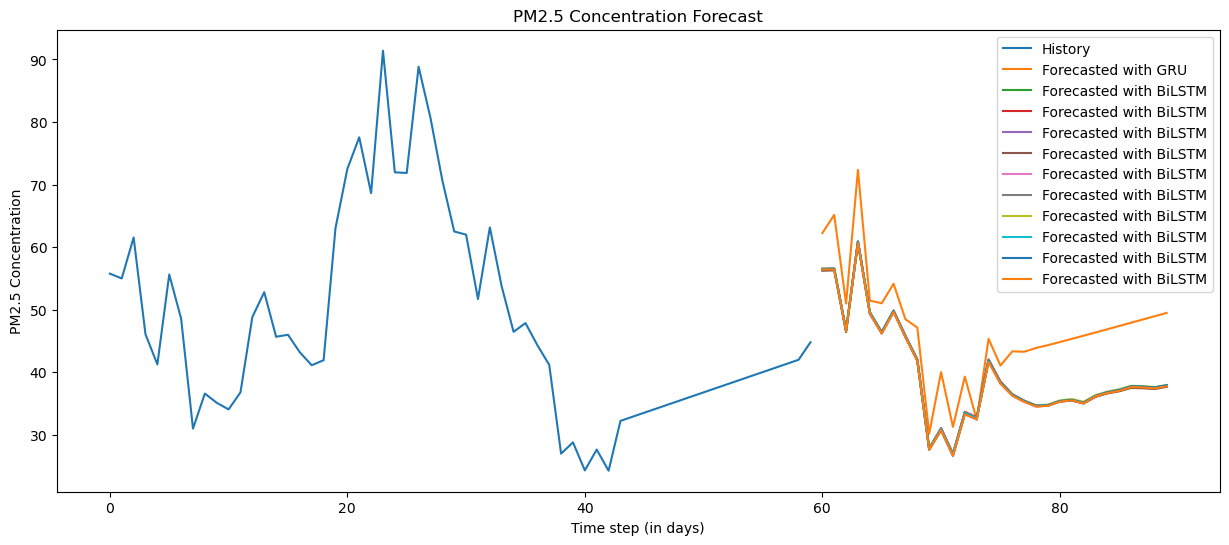

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_step(history, prediction1, prediction2):
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future_gru = np.arange(range_history, range_history + len(prediction1))
    range_future_bilstm = np.arange(range_history, range_history + len(prediction2))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future_gru, np.array(prediction1), label='Forecasted with GRU')
    plt.plot(range_future_bilstm, np.array(prediction2), label='Forecasted with BiLSTM')
    
    plt.legend(loc='upper right')
    plt.xlabel('Time step (in days)')
    plt.ylabel('PM2.5 Concentration')
    plt.title('PM2.5 Concentration Forecast')
    
    plt.show()

# Assuming new_data is a list or array of historical PM2.5 concentrations
plot_multi_step(new_data, prediction_gru, prediction_bilstm)
